# The A1 test steps:
## (1) import libs
- import `numpy` and `matplotlib`
- import `a_star_2_roles` and `create_map`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from create_map import MyMap, Grid, Point
from a_star_2_roles import A_Star_Search

## (2) Generate the Map (For Role C)

[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.1 0.2 0.3 0.4]
[news] Total Num of Grids is: 20 


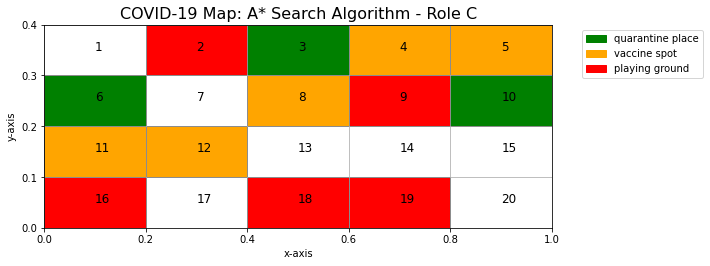

In [2]:
fig, ax= plt.subplots(figsize=(10,5)) # set a 5X10 Canvas

# Row & Column need to be inputted by user
row = 4
column = 5

# create a new map
aMap = MyMap(row, column)

# set the axis range
ax.set_xlim(0,aMap.xlim)
ax.set_ylim(0,aMap.ylim)

# create the scales of the axis
x_arr, y_arr = aMap.get_axis_scales()
# x_arr = np.linspace(0, aMap.xlim, column+1)
# y_arr = np.linspace(0, aMap.ylim, row+1)

# test the values of X and Y axis
print(x_arr)
print(y_arr)

#set axis scales
ax.set_xticks(x_arr)
ax.set_yticks(y_arr)

# set title and axis-lables
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("COVID-19 Map: A* Search Algorithm - Role C", fontsize=16, color='black', verticalalignment="baseline")

# user input the role type
aMap.role_type = 'role_c'

# create all grids
aMap.create_all_grids()

# user input different types of the grids
q_arr = [3,6,10]
v_arr = [4,5,8,11,12]
p_arr = [2,9,16,18,19]

# set each grid's type
for qi in q_arr:
    aMap.list_grids[qi-1].set_type("place_q")
    
for vi in v_arr:
    aMap.list_grids[vi-1].set_type("place_v")
    
for pi in p_arr:
    aMap.list_grids[pi-1].set_type("place_p")  
    
# for item in aMap.list_grids:
#     print( "Num [" + str(item.num) + "] is " + str(item.type))   
#     print("Bottom-left point is : " + str(item.get_bottom_left_point()))
#     print("Top-right point is : " + str(item.get_top_right_point()) + "\n")

# set 3 types for each grid by user: 
# place_q(color:green): quarantine place, place_v(color: orange):vaccine spot, place_p(color: blue): playing ground


#set different color for each grid
# use Rectangle to draw each grid, xy is the bottom-left point of each grid
for item in aMap.list_grids:
    if item.type == "place_q":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="g")
        ax.add_patch(rect)
    elif item.type == "place_v":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="orange")
        ax.add_patch(rect)
    elif item.type == "place_p":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="r")
        ax.add_patch(rect)
    else: 
        pass
    # add text in map for grid's number
    ax.text(item.x + aMap.offsetX/2,item.y+aMap.offsetY/2,str(item.num), fontsize=12, color="k", alpha=1)
    
    
# set legend
patch_q = mpatches.Patch(color='green', label='quarantine place')
patch_v = mpatches.Patch(color='orange', label='vaccine spot')
patch_p = mpatches.Patch(color='red', label='playing ground')
plt.legend(handles=[patch_q, patch_v, patch_p], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')  # Equalize the scale of x-axis and y-axis

ax.grid(True)
plt.show()

## (3) create points for map

In [3]:
aMap.create_all_points()
# test each points's belong num grids
for item in aMap.list_points:
    print(f'{item.x, item.y} Belong num grids are : {item.belong_num_grids}')

[news] Total num of created points is : 30
[news] already set the belong grids num for all points!

(0.0, 0.0) Belong num grids are : {16}
(0.0, 0.1) Belong num grids are : {16, 11}
(0.0, 0.2) Belong num grids are : {11, 6}
(0.0, 0.3) Belong num grids are : {1, 6}
(0.0, 0.4) Belong num grids are : {1}
(0.2, 0.0) Belong num grids are : {16, 17}
(0.2, 0.1) Belong num grids are : {16, 17, 11, 12}
(0.2, 0.2) Belong num grids are : {11, 12, 6, 7}
(0.2, 0.3) Belong num grids are : {1, 2, 6, 7}
(0.2, 0.4) Belong num grids are : {1, 2}
(0.4, 0.0) Belong num grids are : {17, 18}
(0.4, 0.1) Belong num grids are : {17, 18, 12, 13}
(0.4, 0.2) Belong num grids are : {8, 12, 13, 7}
(0.4, 0.3) Belong num grids are : {8, 2, 3, 7}
(0.4, 0.4) Belong num grids are : {2, 3}
(0.6, 0.0) Belong num grids are : {18, 19}
(0.6, 0.1) Belong num grids are : {18, 19, 13, 14}
(0.6, 0.2) Belong num grids are : {8, 9, 13, 14}
(0.6, 0.3) Belong num grids are : {8, 9, 3, 4}
(0.6, 0.4) Belong num grids are : {3, 4}
(0.8

## implement A Star Search
Todo list:  
- [x] complete h(n) using Mathattn distance
- [x] calculate g(n)
- [x] f(n) = g(n) + h(n)
- [x] construct priority queue
- [x] find optimal path
- [x] complete enter coordinates x and y

# For Role C:
## (4) Run A star search

In [4]:

# test the end point
# start_point = Point(0.4, 0.3)
# end_point = Point(0.2,0.1)

# test no found path
# start_point = Point(0.2, 0.1)
# end_point = Point(0.4,0.05)

# test same start and end points
# start_point = Point(0.4, 0.1)
# end_point = Point(0.4,0.1)


# case: the edge of the 2 playing ground
# start_point = Point(0.6, 0.05)
# end_point = Point(0.0,0.233)

# user input the start and end points' coordinates: x and y
start_point = Point(0.4, 0.0)
end_point = Point(1.0,0.2333)

# start_point = Point(0.2, 0.2)
# end_point = Point(1.0,0.2333)

myAstar = A_Star_Search(start_point,end_point, aMap)
myAstar.start()



[Role] The current Role is role_c

[News] Set total 12 goal points to search!
--------------------------------------------------
[News] Valid points, A star searching...
[Warning] Point (0.4, 0.0) does not need to transform!
[Warning] Failed Transform point (0.4, 0.0)!
[Transform] Point is : (1.0, 0.2333)
[Transform] new Point is (1.0, 0.3)
[Transform] Start Point (0.4, 0.0), End Point (1.0, 0.3)
[News] Valid Start points, searching...
--------------------------------------------------
[News] Valid goal point (0.0, 0.2), searching...
--------------------------------------------------
[Searching] Basic 4 directions ('up, down, left, right'), if the point is in the close list, then not search!
[Searching] If the point is already in the open list, compare its f_cost with the old one.
            If the new one is less than old one, then update its f_cost and parent node.
   [Point] from (0.4, 0.0) to (0.4, 0.1)
   [h cost] is 3.0
   [g cost] is 2.0
   [f cost] is 5.0 

   [Point] from (0.

## (5) Draw path

[[0.4 0. ]
 [0.2 0. ]
 [0.2 0.1]
 [0.2 0.2]]


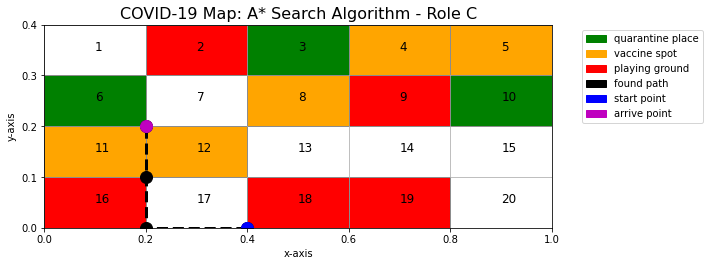

In [5]:

path = myAstar.get_optimal_path()

print(path)
# draw path
ax.plot(*zip(*path), marker='o', color = 'k', linestyle='dashed', linewidth=3, markersize=12, label='path')

# draw start and end point's colors
ax.plot(*zip(path[0]),marker='o', color = 'b', markersize=12)
ax.plot(*zip(path[-1]),marker='o', color = 'm', markersize=12)

# update the legend lables
patch_path = mpatches.Patch(color='black', label='found path' )
patch_start = mpatches.Patch(color='blue', label='start point')
patch_end = mpatches.Patch(color='m', label='arrive point')
ax.legend(handles=[patch_q, patch_v, patch_p, patch_path, patch_start, patch_end], bbox_to_anchor=(1.05, 1.0), loc='upper left')


# display the figure
fig

# **Notice** Restart the kernel 

# Test Role V


## (1) Create map

[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.1 0.2 0.3 0.4]
[news] Total Num of Grids is: 20 


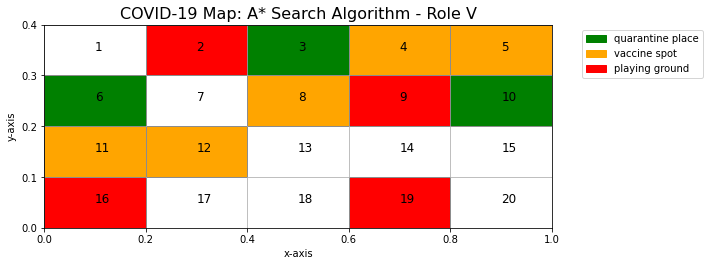

In [6]:
fig, ax= plt.subplots(figsize=(10,5)) # set a 5X10 Canvas

# Row & Column need to be inputted by user
row = 4
column = 5

# create a new map
aMap = MyMap(row, column)

# set the axis range
ax.set_xlim(0,aMap.xlim)
ax.set_ylim(0,aMap.ylim)

# create the scales of the axis
x_arr, y_arr = aMap.get_axis_scales()
# x_arr = np.linspace(0, aMap.xlim, column+1)
# y_arr = np.linspace(0, aMap.ylim, row+1)

# test the values of X and Y axis
print(x_arr)
print(y_arr)

#set axis scales
ax.set_xticks(x_arr)
ax.set_yticks(y_arr)

# set title and axis-lables
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("COVID-19 Map: A* Search Algorithm - Role V", fontsize=16, color='black', verticalalignment="baseline")

# user input the role type
aMap.role_type = 'role_v'

# create all grids
aMap.create_all_grids()

# user input different types of the grids
q_arr = [3,6,10]
v_arr = [4,5,8,11,12]
p_arr = [2,9,16,19]


# set each grid's type
for qi in q_arr:
    aMap.list_grids[qi-1].set_type("place_q")
    
for vi in v_arr:
    aMap.list_grids[vi-1].set_type("place_v")
    
for pi in p_arr:
    aMap.list_grids[pi-1].set_type("place_p")  
    
# for item in aMap.list_grids:
#     print( "Num [" + str(item.num) + "] is " + str(item.type))   
#     print("Bottom-left point is : " + str(item.get_bottom_left_point()))
#     print("Top-right point is : " + str(item.get_top_right_point()) + "\n")

# set 3 types for each grid by user: 
# place_q(color:green): quarantine place, place_v(color: orange):vaccine spot, place_p(color: blue): playing ground


#set different color for each grid
# use Rectangle to draw each grid, xy is the bottom-left point of each grid
for item in aMap.list_grids:
    if item.type == "place_q":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="g")
        ax.add_patch(rect)
    elif item.type == "place_v":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="orange")
        ax.add_patch(rect)
    elif item.type == "place_p":
        rect = mpatches.Rectangle(item.get_bottom_left_point(), aMap.offsetX, aMap.offsetY, edgecolor="black", facecolor="r")
        ax.add_patch(rect)
    else: 
        pass
    # add text in map for grid's number
    ax.text(item.x + aMap.offsetX/2,item.y+aMap.offsetY/2,str(item.num), fontsize=12, color="k", alpha=1)
    
    
# set legend
patch_q = mpatches.Patch(color='green', label='quarantine place')
patch_v = mpatches.Patch(color='orange', label='vaccine spot')
patch_p = mpatches.Patch(color='red', label='playing ground')
plt.legend(handles=[patch_q, patch_v, patch_p], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')  # Equalize the scale of x-axis and y-axis

ax.grid(True)
plt.show()

## (2) Create points in the map

In [7]:
aMap.create_all_points()
# test each points's belong num grids
for item in aMap.list_points:
    print(f'{item.x, item.y} Belong num grids are : {item.belong_num_grids}')

[news] Total num of created points is : 30
[news] already set the belong grids num for all points!

(0.0, 0.0) Belong num grids are : {16}
(0.0, 0.1) Belong num grids are : {16, 11}
(0.0, 0.2) Belong num grids are : {11, 6}
(0.0, 0.3) Belong num grids are : {1, 6}
(0.0, 0.4) Belong num grids are : {1}
(0.2, 0.0) Belong num grids are : {16, 17}
(0.2, 0.1) Belong num grids are : {16, 17, 11, 12}
(0.2, 0.2) Belong num grids are : {11, 12, 6, 7}
(0.2, 0.3) Belong num grids are : {1, 2, 6, 7}
(0.2, 0.4) Belong num grids are : {1, 2}
(0.4, 0.0) Belong num grids are : {17, 18}
(0.4, 0.1) Belong num grids are : {17, 18, 12, 13}
(0.4, 0.2) Belong num grids are : {8, 12, 13, 7}
(0.4, 0.3) Belong num grids are : {8, 2, 3, 7}
(0.4, 0.4) Belong num grids are : {2, 3}
(0.6, 0.0) Belong num grids are : {18, 19}
(0.6, 0.1) Belong num grids are : {18, 19, 13, 14}
(0.6, 0.2) Belong num grids are : {8, 9, 13, 14}
(0.6, 0.3) Belong num grids are : {8, 9, 3, 4}
(0.6, 0.4) Belong num grids are : {3, 4}
(0.8

## (3) Run A star search

In [8]:
# user input the start and end points' coordinates: x and y
start_point = Point(0.8, 0.0)
end_point = Point(0.0,0.1333)

myAstar = A_Star_Search(start_point,end_point, aMap)
myAstar.start()

[Role] The current Role is role_v

[News] Set total 14 goal points to search!
--------------------------------------------------
[News] Valid points, A star searching...
[Warning] Point (0.8, 0.0) does not need to transform!
[Warning] Failed Transform point (0.8, 0.0)!
[Transform] Point is : (0.0, 0.1333)
[Transform] new Point is (0.0, 0.1)
[Transform] Start Point (0.8, 0.0), End Point (0.0, 0.1)
[News] Valid Start points, searching...
--------------------------------------------------
[News] Valid goal point (0.0, 0.1), searching...
--------------------------------------------------
[Searching] Basic 4 directions ('up, down, left, right'), if the point is in the close list, then not search!
[Searching] If the point is already in the open list, compare its f_cost with the old one.
            If the new one is less than old one, then update its f_cost and parent node.
   [Point] from (0.8, 0.0) to (0.8, 0.1)
   [h cost] is 4.0
   [g cost] is 1.5
   [f cost] is 5.5 

   [Point] from (0.

   [Point] from (0.6, 0.0) to (0.4, 0.1)
   [h cost] is 3.0
   [g cost] is 3.8
   [f cost] is 6.8 

[Completed] Have searched 8 directions!
--------------------------------------------------
[Searching] Basic 4 directions ('up, down, left, right'), if the point is in the close list, then not search!
[Searching] If the point is already in the open list, compare its f_cost with the old one.
            If the new one is less than old one, then update its f_cost and parent node.
[Completed] Have searched basic 4 directions!
[Searching] 4 diagonal directions ('N-E: North-East','N-W: North-West', 'S-E: Sorth-East', 'S-W: Sourth West'), if the point is in the close list, then not search!
[Searching] If the point is already in the open list, compare its f_cost with the old one.
            If the new one is less than old one, then update its f_cost and parent node.
   [Point] from (0.6, 0.1) to (0.4, 0.2)
   [h cost] is 3.0
   [g cost] is 4.3
   [f cost] is 7.3 

[Completed] Have searched 8 d

## (4) Draw Path

[[0.8 0. ]
 [0.6 0. ]
 [0.4 0.1]]


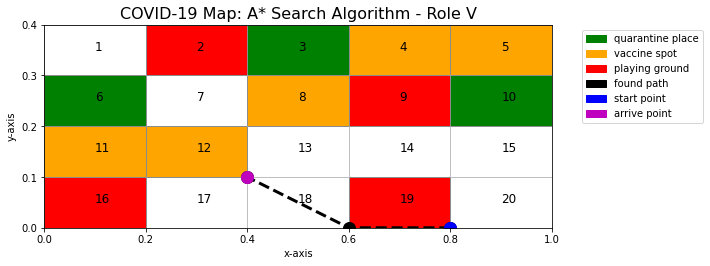

In [9]:

path = myAstar.get_optimal_path()

print(path)
# draw path
ax.plot(*zip(*path), marker='o', color = 'k', linestyle='dashed', linewidth=3, markersize=12, label='path')

# draw start and end point's colors
ax.plot(*zip(path[0]),marker='o', color = 'b', markersize=12)
ax.plot(*zip(path[-1]),marker='o', color = 'm', markersize=12)

# update the legend lables
patch_path = mpatches.Patch(color='black', label='found path' )
patch_start = mpatches.Patch(color='blue', label='start point')
patch_end = mpatches.Patch(color='m', label='arrive point')
ax.legend(handles=[patch_q, patch_v, patch_p, patch_path, patch_start, patch_end], bbox_to_anchor=(1.05, 1.0), loc='upper left')


# display the figure
fig